In [190]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pytz

In [191]:
locust_data_file = "data/data_stats_history.csv"
kepler_data_file = "data/Kepler container Joules Total in Namespace_ _All_ (for export)-data-as-joinbyfield-2024-07-07 22_05_31.csv"
pdu_data_file = "data/Server PDU Watt Overall Comsumption-data-2024-07-07 22_05_01.csv"

stages = [
    {"users": 100, "spawn_rate": 2},
    {"users": 200, "spawn_rate": 20},
    {"users": 300, "spawn_rate": 20},
    {"users": 500, "spawn_rate": 20},
    {"users": 800, "spawn_rate": 20},
    {"users": 1300, "spawn_rate": 50},
    {"users": 2100, "spawn_rate": 50}
]

valid_users = set()
for stage in stages:
    valid_users.add(stage['users'])

In [192]:
# CSV Daten in DataFrame einlesen
locust_df = pd.read_csv("%s" % locust_data_file)

# Konvertiere die Zeitstempel in ein datetime-Format, um die Daten einfacher zu analysieren
locust_df['Timestamp'] = pd.to_datetime(locust_df['Timestamp'], unit='s')
# Zeitzone in Deutschland festlegen
germany_tz = pytz.timezone('Europe/Berlin')
locust_df['Timestamp'] = locust_df['Timestamp'].dt.tz_localize('UTC').dt.tz_convert(germany_tz)

# Setze den Zeitstempel als Index
locust_df.set_index('Timestamp', inplace=True)

# Entferne die Spalte 'Type'
locust_df.drop(columns=['Type'], inplace=True)

# Filtere die Zeilen, bei denen 'Request Count' gleich 0 ist
locust_df = locust_df[locust_df['Total Request Count'] != 0]

# Entferne alle Zeilen, bei denen 'users' nicht im Set 'valid_users' ist
locust_df = locust_df[locust_df['User Count'].isin(valid_users)]

In [193]:
locust_df

,User Count,Name,Requests/s,Failures/s,50%,66%,75%,80%,90%,95%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-07-07 20:26:14+02:00,100,Aggregated,0.0,0.0,130.0,460.0,480.0,480.0,720.0,970.0,...,970.0,970.0,970.0,11,0,130.0,295.516820,46.701196,966.597475,11267.909091
2024-07-07 20:26:15+02:00,100,Aggregated,0.0,0.0,130.0,460.0,480.0,480.0,720.0,970.0,...,970.0,970.0,970.0,11,0,130.0,295.516820,46.701196,966.597475,11267.909091
2024-07-07 20:26:16+02:00,100,Aggregated,0.0,0.0,90.0,150.0,200.0,420.0,590.0,850.0,...,970.0,970.0,970.0,58,0,73.0,202.143576,46.701196,966.597475,13037.103448
2024-07-07 20:26:17+02:00,100,Aggregated,29.0,0.0,73.0,140.0,200.0,360.0,560.0,720.0,...,1800.0,1800.0,1800.0,107,0,73.0,202.649609,44.158179,1810.633184,13713.242991
2024-07-07 20:26:18+02:00,100,Aggregated,29.0,0.0,73.0,140.0,200.0,360.0,560.0,720.0,...,1800.0,1800.0,1800.0,107,0,73.0,202.649609,44.158179,1810.633184,13713.242991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-07 21:04:10+02:00,2100,Aggregated,300.8,27.4,210.0,350.0,480.0,580.0,1100.0,30000.0,...,191000.0,200000.0,342000.0,152258,12167,210.0,3123.155774,38.043605,341602.933423,6762.055702
2024-07-07 21:04:11+02:00,2100,Aggregated,300.6,27.8,210.0,350.0,480.0,580.0,1100.0,30000.0,...,192000.0,200000.0,342000.0,152515,12195,210.0,3126.877773,38.043605,341602.933423,6760.495748
2024-07-07 21:04:12+02:00,2100,Aggregated,305.8,28.4,210.0,350.0,480.0,580.0,1100.0,30000.0,...,192000.0,200000.0,342000.0,152844,12228,210.0,3128.039713,38.043605,341602.933423,6766.310526


In [194]:
locust_df.index.min(), locust_df.index.max()

(Timestamp('2024-07-07 20:26:14+0200', tz='Europe/Berlin'),
 Timestamp('2024-07-07 21:04:14+0200', tz='Europe/Berlin'))

<Figure size 1200x600 with 0 Axes>

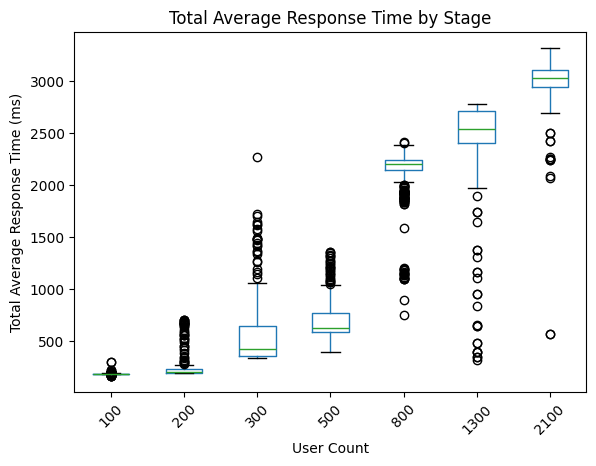

<Figure size 1200x600 with 0 Axes>

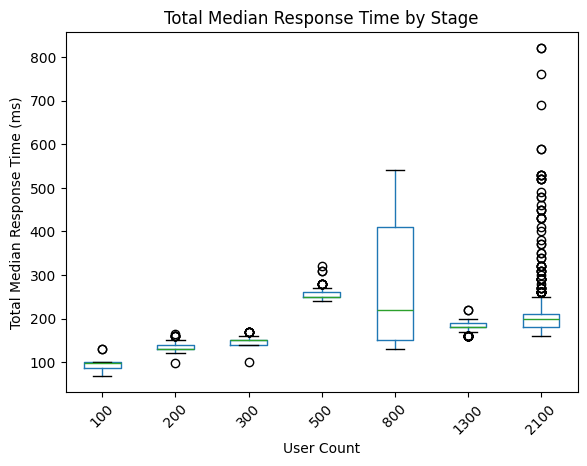

In [195]:
# Box plot für Total Average Response Time
plt.figure(figsize=(12, 6))
locust_df.boxplot(column='Total Average Response Time', by='User Count', grid=False)
plt.title('Total Average Response Time by Stage')
plt.suptitle('')
plt.xlabel('User Count')
plt.ylabel('Total Average Response Time (ms)')
plt.xticks(rotation=45)
plt.show()

# Box plot für Total Median Response Time
plt.figure(figsize=(12, 6))
locust_df.boxplot(column='Total Median Response Time', by='User Count', grid=False)
plt.title('Total Median Response Time by Stage')
plt.suptitle('')
plt.xlabel('User Count')
plt.ylabel('Total Median Response Time (ms)')
plt.xticks(rotation=45)
plt.show()

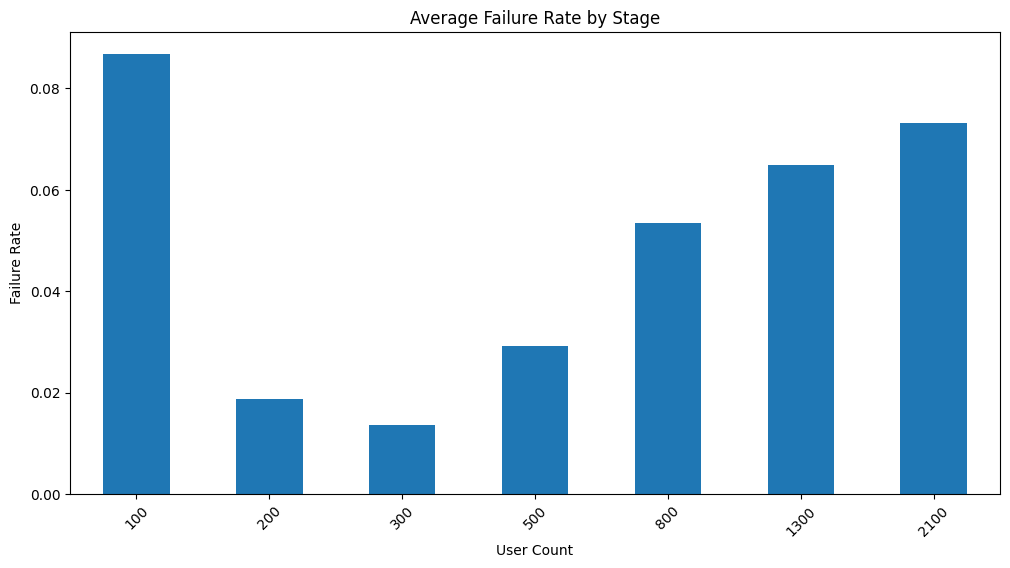

In [196]:
# Fehlerrate analysieren
locust_df['Failure Rate'] = locust_df['Total Failure Count'] / (
            locust_df['Total Request Count'] + locust_df['Total Failure Count'])

plt.figure(figsize=(12, 6))
locust_df.groupby('User Count')['Failure Rate'].mean().plot(kind='bar', rot=45)
plt.title('Average Failure Rate by Stage')
plt.xlabel('User Count')
plt.ylabel('Failure Rate')
plt.show()

           Total Average Response Time                           \
                                  mean       median         std   
User Count                                                        
100                         186.298976   185.266089   11.482635   
200                         267.374564   198.991787  146.187117   
300                         598.707765   427.325271  376.862293   
500                         697.185497   622.521590  216.318430   
800                        2114.907375  2199.826331  269.178679   
1300                       2440.078042  2538.279814  456.232902   
2100                       2997.634611  3030.128690  216.839737   

           Total Median Response Time                    Failure Rate  \
                                 mean median         std         mean   
User Count                                                              
100                         91.673835   97.0   10.892760     0.086799   
200                        133.873951

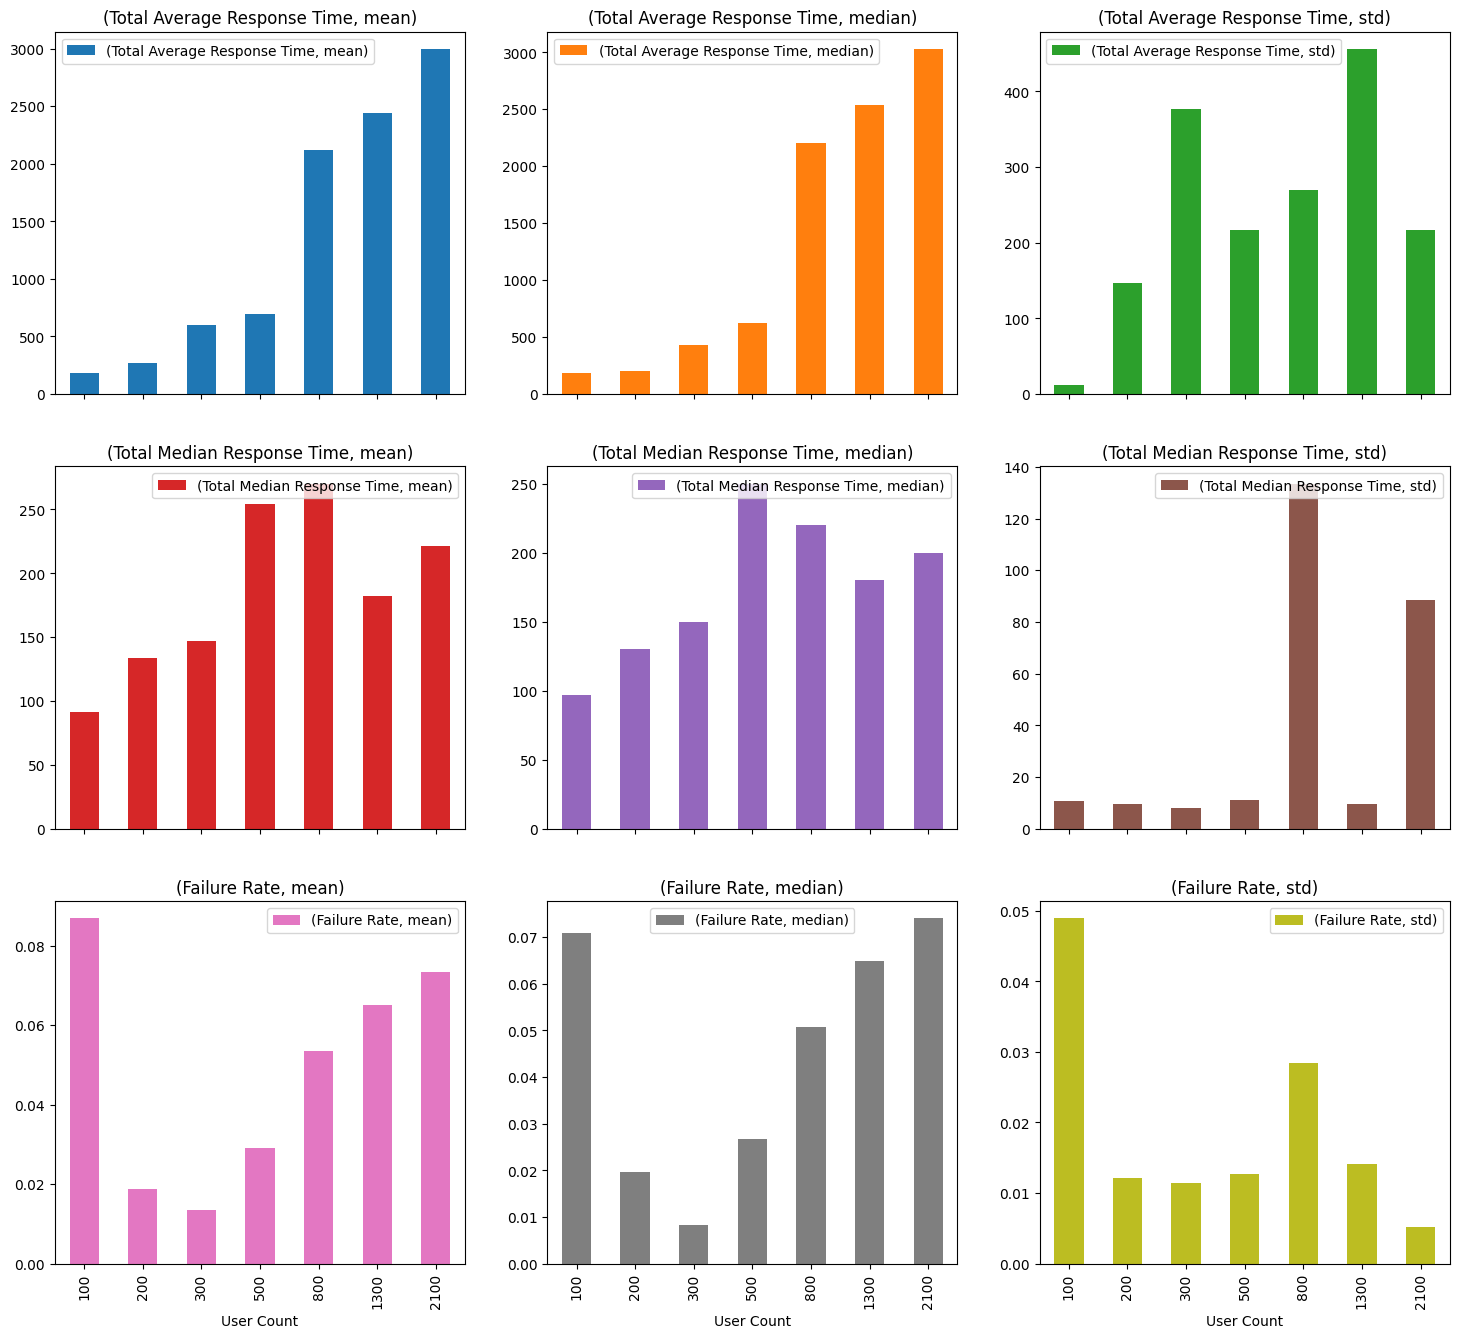

In [197]:
# Gesamte Läufe vergleichen
summary_stats = locust_df.groupby('User Count').agg({
    'Total Average Response Time': ['mean', 'median', 'std'],
    'Total Median Response Time': ['mean', 'median', 'std'],
    'Failure Rate': ['mean', 'median', 'std']
})

print(summary_stats)

# Visualisierung der zusammengefassten Statistiken
summary_stats.plot(kind='bar', subplots=True, layout=(3, 3), figsize=(18, 16))
plt.show()

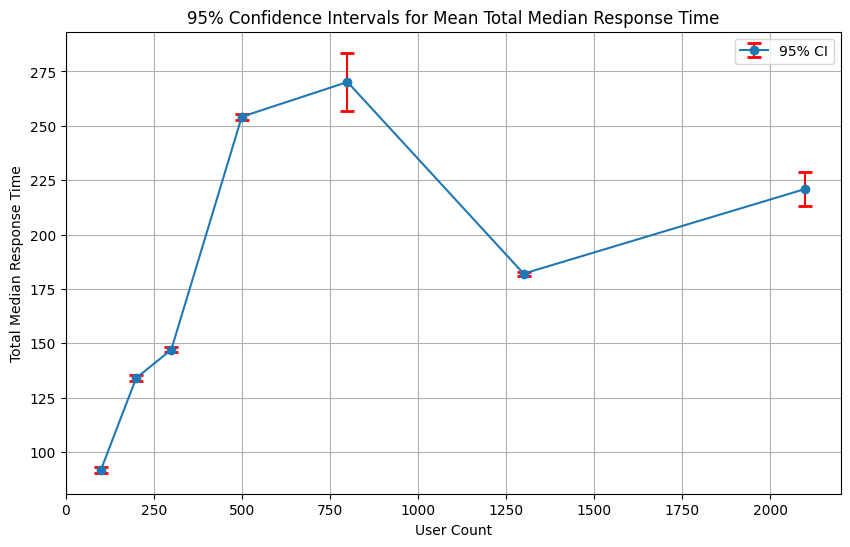

In [198]:
# Calculate confidence intervals for the 'Total Median Response Time'
grouped_stats = locust_df.groupby('User Count')['Total Median Response Time'].agg(['mean', 'count', 'std'])

# Calculate t-value for a 95% confidence interval
t_value = stats.t.ppf(0.975, grouped_stats['count'] - 1)  # 0.975 corresponds to (1 - alpha/2)

# Calculate the margin of error
grouped_stats['margin_of_error'] = t_value * grouped_stats['std'] / (grouped_stats['count'] ** 0.5)

# Calculate the lower and upper bounds of the confidence interval
grouped_stats['ci_low'] = grouped_stats['mean'] - grouped_stats['margin_of_error']
grouped_stats['ci_high'] = grouped_stats['mean'] + grouped_stats['margin_of_error']

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(grouped_stats.index, grouped_stats['mean'],
             yerr=grouped_stats['margin_of_error'],
             fmt='-o', ecolor='r', capsize=5, capthick=2, label='95% CI')

plt.title('95% Confidence Intervals for Mean Total Median Response Time')
plt.xlabel('User Count')
plt.ylabel('Total Median Response Time')
plt.legend()
plt.grid(True)
plt.show()

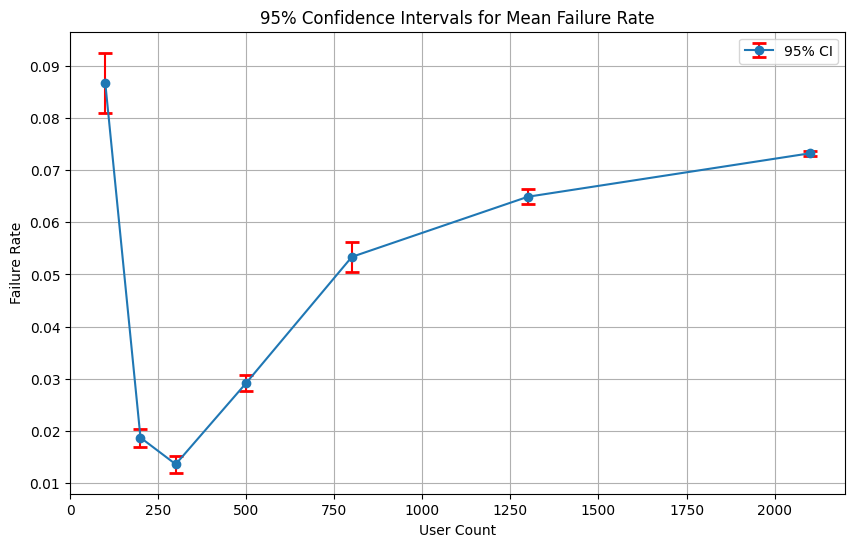

In [199]:
# Calculate confidence intervals for the 'Failure Rate'
grouped_stats = locust_df.groupby('User Count')['Failure Rate'].agg(['mean', 'count', 'std'])

# Calculate t-value for a 95% confidence interval
t_value = stats.t.ppf(0.975, grouped_stats['count'] - 1)  # 0.975 corresponds to (1 - alpha/2)

# Calculate the margin of error
grouped_stats['margin_of_error'] = t_value * grouped_stats['std'] / (grouped_stats['count'] ** 0.5)

# Calculate the lower and upper bounds of the confidence interval
grouped_stats['ci_low'] = grouped_stats['mean'] - grouped_stats['margin_of_error']
grouped_stats['ci_high'] = grouped_stats['mean'] + grouped_stats['margin_of_error']

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(grouped_stats.index, grouped_stats['mean'],
             yerr=grouped_stats['margin_of_error'],
             fmt='-o', ecolor='r', capsize=5, capthick=2, label='95% CI')

plt.title('95% Confidence Intervals for Mean Failure Rate')
plt.xlabel('User Count')
plt.ylabel('Failure Rate')
plt.legend()
plt.grid(True)
plt.show()

In [200]:
# Determine the appropriate unit for the total energy consumed
def convert_energy(total_energy_joules):
    if total_energy_joules >= 1e6:  # 1 Megajoule = 1,000,000 Joules
        energy_unit = "MJ"
        total_energy = total_energy_joules / 1e6
    elif total_energy_joules >= 1e3:  # 1 Kilojoule = 1,000 Joules
        energy_unit = "kJ"
        total_energy = total_energy_joules / 1e3
    else:
        energy_unit = "J"
        total_energy = total_energy_joules
    return total_energy, energy_unit

def transform_joules(energy, from_unit, to_unit):
    # Conversion factors to Joules
    conversion_to_joules = {
        "MJ": 1e6,
        "kJ": 1e3,
        "J": 1
    }
    
    if from_unit not in conversion_to_joules:
        raise ValueError(f"Unknown from_unit: {from_unit}")
    
    if to_unit not in conversion_to_joules:
        raise ValueError(f"Unknown to_unit: {to_unit}")
    
    # Convert from original unit to Joules
    energy_in_joules = energy * conversion_to_joules[from_unit]
    
    # Convert from Joules to the target unit
    energy_in_target_unit = energy_in_joules / conversion_to_joules[to_unit]
    
    return energy_in_target_unit

In [202]:
kepler_df = pd.read_csv(kepler_data_file,  parse_dates=['Time'])
kepler_df['Time'] = pd.to_datetime(kepler_df['Time'])  # Ensure consistent timezone
# Ensure the DataFrame is sorted by Time
kepler_df = kepler_df.sort_values(by='Time')
kepler_df.index = pd.to_datetime(kepler_df.index)
for column in kepler_df.columns:
    if column != 'Time':
        kepler_df[column] = kepler_df[column].ffill().fillna(0)

def calculate_kepler_energy_consumption(kepler_df, start_time, end_time):
    # Ensure the DataFrame is sorted by Time
    kepler_df = kepler_df.sort_values(by='Time')
    
    # Check if start_time is within the DataFrame's time range
    if start_time < kepler_df['Time'].min():
        print(f"Start time {start_time} is before the first timestamp. Using the first available value.")
        start_values = kepler_df.iloc[0].drop(labels='Time')
    else:
        start_values = kepler_df.loc[kepler_df['Time'] >= start_time].iloc[0].drop(labels='Time')

    # Check if end_time is within the DataFrame's time range
    if end_time > kepler_df['Time'].max():
        print(f"End time {end_time} is after the last timestamp. Using the last available value.")
        end_values = kepler_df.iloc[-1].drop(labels='Time')
    elif end_time<kepler_df['Time'].min():
        return 0, "J"
    else:
        end_values = kepler_df.loc[kepler_df['Time'] <= end_time].iloc[-1].drop(labels='Time')
    
    # Calculate the difference between end and start values
    energy_difference = end_values.values - start_values.values

    # Sum up the differences
    total_energy_sum = energy_difference.sum()

    return convert_energy(total_energy_sum)


# Define your time range
start_time = pd.Timestamp('2024-07-07 15:50:00')
end_time = pd.Timestamp('2024-07-07 17:59:00')

# Calculate energy consumption for the specified time range
total_energy, unit = calculate_kepler_energy_consumption(kepler_df, start_time, end_time)

print(f"Total energy consumed from {start_time} to {end_time}: {total_energy} {unit}")

Start time 2024-07-07 15:50:00 is before the first timestamp. Using the first available value.
Total energy consumed from 2024-07-07 15:50:00 to 2024-07-07 17:59:00: 0 J


In [203]:
pdu_df = pd.read_csv(pdu_data_file,  parse_dates=['Time'])
pdu_df['Time'] = pd.to_datetime(pdu_df['Time'])  # Ensure consistent timezone
# Ensure the DataFrame is sorted by Time
pdu_df = pdu_df.sort_values(by='Time')
pdu_df.index = pd.to_datetime(pdu_df.index)

# Function to remove ' W' and convert to numeric
def strip_w_convert(series):
    return pd.to_numeric(series.str.replace(' W', ''), errors='coerce')

# Apply the function to all columns except 'Time'
for column in pdu_df.columns:
    if column != 'Time':
        pdu_df[column] = strip_w_convert(pdu_df[column])

def calculate_pdu_energy_consumption(pdu_df, start_time, end_time):
    # Filter the DataFrame for the specified time range
    time_filtered_df = pdu_df[(pdu_df['Time'] >= start_time) & (pdu_df['Time'] <= end_time)].copy()

    if time_filtered_df.empty:
        print("The filtered DataFrame is empty. Ensure the time range is within the data bounds.")
        return convert_energy(0)

    # Calculate time difference between consecutive measurements in seconds
    time_filtered_df.loc[:, 'Time_diff'] = time_filtered_df['Time'].diff().dt.total_seconds()

    # Calculate the energy consumed during each interval (Power * Time_diff)
    time_filtered_df['Energy_Joules'] = time_filtered_df['Value'] * time_filtered_df['Time_diff']

    # Summing up the energy consumed
    total_energy_joules = time_filtered_df['Energy_Joules'].sum()

    # Convert the total energy to the appropriate unit
    return convert_energy(total_energy_joules)

# Define your time range
start_time = pd.Timestamp('2024-07-07 15:50:00')
end_time = pd.Timestamp('2024-07-07 17:59:00')

# Calculate energy consumption for the specified time range
total_energy, unit = calculate_pdu_energy_consumption(pdu_df, start_time, end_time)

print(f"Total energy consumed from {start_time} to {end_time}: {total_energy} {unit}")


The filtered DataFrame is empty. Ensure the time range is within the data bounds.
Total energy consumed from 2024-07-07 15:50:00 to 2024-07-07 17:59:00: 0 J


In [204]:
kepler_energy = []
pdu_energy = []
user_counts = []

# Loop through each stage
for stage in stages:
    stage_users = stage['users']
    stage_df = locust_df[locust_df['User Count'] == stage_users]
    
    # Append zeros for empty DataFrame and continue
    if stage_df.empty:
        print("The filtered DataFrame is empty. Ensure the time range is within the data bounds.")
        kepler_energy.append(0)
        pdu_energy.append(0)
        user_counts.append(stage_users)
        continue

    # Get the min and max index (time) for the current stage
    start_time, end_time = stage_df.index.min(), stage_df.index.max()
    
    # Convert the timezoned datetime to naive datetime (UTC or localize as needed)
    start_time = start_time.tz_convert("Europe/Berlin").tz_localize(None)
    end_time = end_time.tz_convert("Europe/Berlin").tz_localize(None)
    print("Stage:",stage_users," From:",start_time," To:", end_time)
        
    k_energy, k_unit = calculate_kepler_energy_consumption(kepler_df, start_time, end_time)
    p_energy, p_unit = calculate_pdu_energy_consumption(pdu_df, start_time, end_time)
    
    kepler_energy.append(transform_joules(k_energy, k_unit, "kJ"))
    pdu_energy.append(transform_joules(p_energy, p_unit, "kJ"))
    user_counts.append(stage_users)

print(kepler_energy, pdu_energy, user_counts)

Stage: 100  From: 2024-07-07 20:26:14  To: 2024-07-07 20:30:54
Stage: 200  From: 2024-07-07 20:30:59  To: 2024-07-07 20:34:14
Stage: 300  From: 2024-07-07 20:34:20  To: 2024-07-07 20:37:34
Stage: 500  From: 2024-07-07 20:37:44  To: 2024-07-07 20:42:35
Stage: 800  From: 2024-07-07 20:42:50  To: 2024-07-07 20:49:14
Stage: 1300  From: 2024-07-07 20:49:25  To: 2024-07-07 20:55:55
Stage: 2100  From: 2024-07-07 20:56:11  To: 2024-07-07 21:04:14
[19.491, 12.114, 14.935, 27.721, 22.99, 23.385, 36.065] [48.47, 33.465, 36.605, 60.865, 63.93, 64.425, 87.735] [100, 200, 300, 500, 800, 1300, 2100]


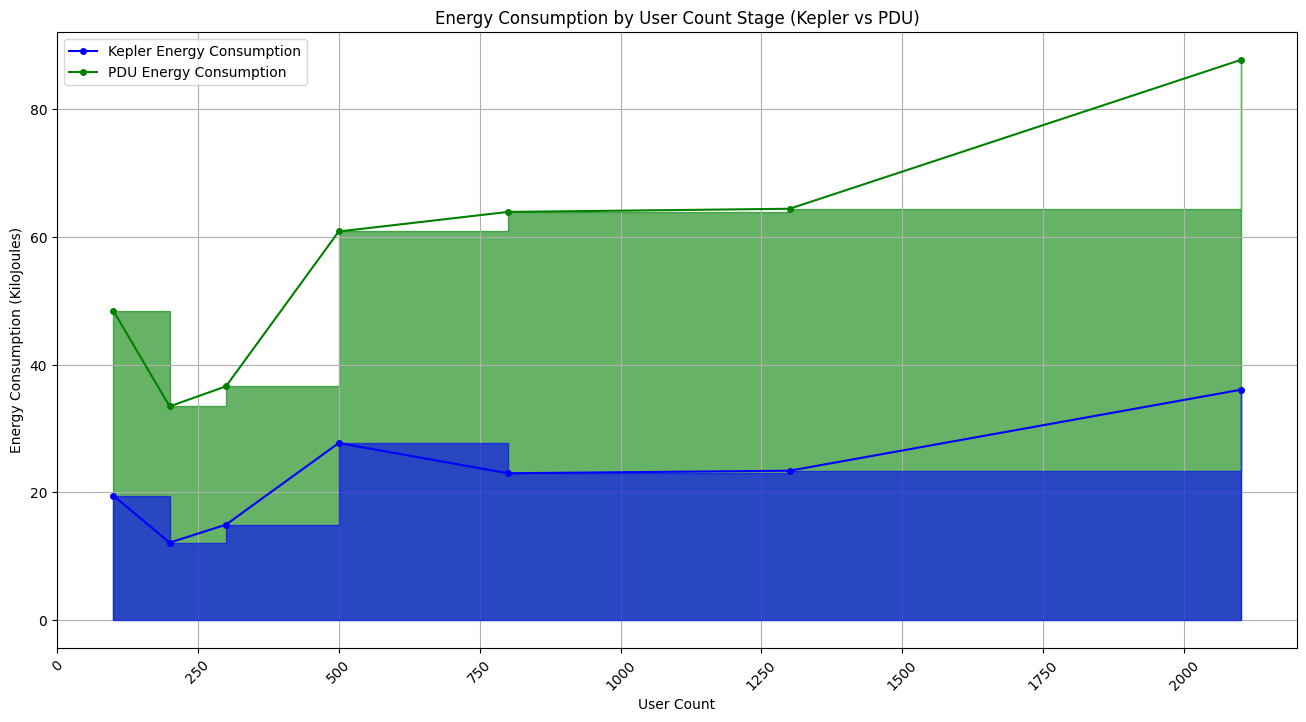

In [207]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot lines with markers to make data points visible
ax.plot(user_counts, kepler_energy, label='Kepler Energy Consumption', color='blue', marker='o', markersize=4, zorder=50)
ax.plot(user_counts, pdu_energy, label='PDU Energy Consumption', color='green', marker='o', markersize=4, zorder=50)

# Fill between for kepler energy
ax.fill_between(user_counts, kepler_energy, color='blue', alpha=0.6, step='post', zorder=5)

# Fill between for pdu energy
ax.fill_between(user_counts, pdu_energy, color='green', alpha=0.6, step='post', zorder=1)

# Additional Plot Settings
ax.set_xlabel('User Count')
ax.set_ylabel('Energy Consumption (KiloJoules)')
ax.set_title('Energy Consumption by User Count Stage (Kepler vs PDU)')
ax.legend()
ax.grid(True)

# Rotate x-ticks
plt.xticks(rotation=45)

# Show plot
plt.show()